# Model - Actuator Selection

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_1, simulation_actuator_selection, plot_simulation

In [2]:
sys_model = 'System Model 3'
S = sys_from_file(sys_model)

System read from file @ system_model/System Model 3.pickle 



In [3]:
ret1 = cost_function_1(S)
# print(ret1)

Generating random sample of initial state from given distribution for simulation


Generating random sample of initial state from given distribution for simulation


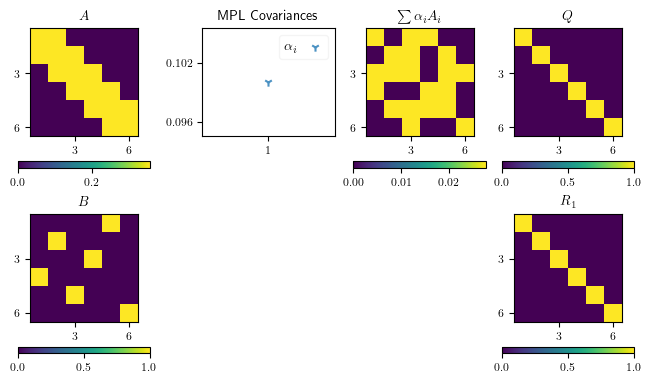

In [4]:
ret2 = actuator_selection_cost_1(S)
S1 = ret2['system']
system_display_matrix(S1)

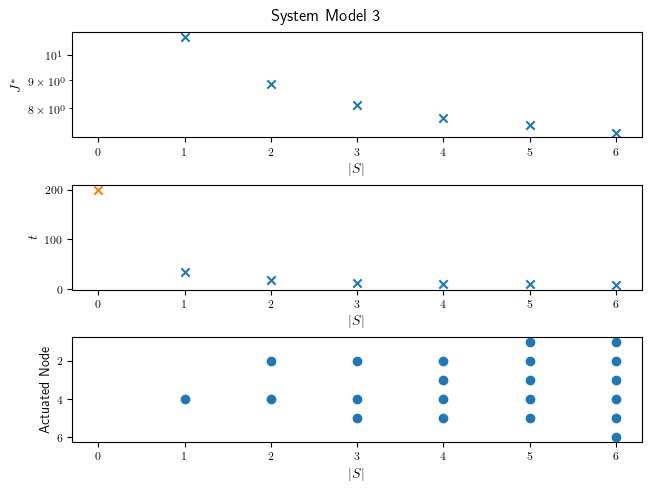

In [5]:
B = np.pad(S1['B'], ((0,0),(1,0)), 'constant')
if ret1['P_check'] != 0:
    cost0 = np.nan
else:
    cost0 = ret1['J_trend'][-1]
cost = np.insert(ret2['cost_trend'], 0, cost0, axis=0)
time = np.insert(ret2['time_trend'], 0, ret1['t'], axis=0)
check = np.insert(ret2['check_trend'], 0, ret1['P_check'], axis=0)

plot_actuator_selection_1(B, cost, time, check, S1['label'])

Generating random sample of initial state from given distribution for simulation


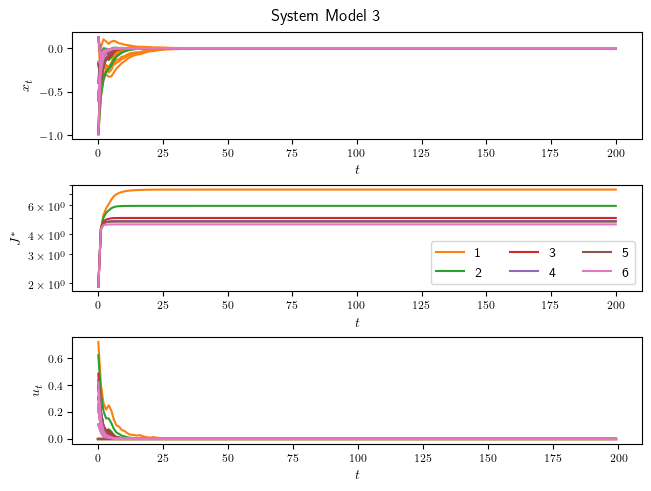

In [6]:
ret3 = simulation_actuator_selection(S1, S1)
# print(ret3)
plot_simulation(ret3, fname=S1['label'])